# Chapter 3: Mining the 20 Newsgroups Dataset with Clustering and Topic Modeling Algorithms

## K-means, from scratch

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

The IRIS dataset contains three classes, for three different iris colors.
We plot them in a scatter plot.

In [2]:
X = iris.data[:,2:4]
y = iris.target
import numpy as np
from matplotlib import pyplot as plt
y_0 = np.where(y==0)
plt.scatter(X[y_0,0],X[y_0,1])
y_1 = np.where(y==1)
plt.scatter(X[y_1,0],X[y_1,1])
y_2 = np.where(y==2)
plt.scatter(X[y_2,0],X[y_2,1])

If we didn't know the classes, we could try to group them by 2 or 3 clusters.
FIrst we set k, the number of clusters. Then we initialize their centroids to a random point in the dataset.

In [3]:
k = 3
random_index = np.random.choice(range(len(X)),k)
centroids = X[random_index]

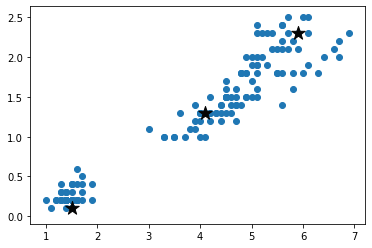

In [4]:
def visualize_centroids(X,centroids):
    plt.scatter(X[:,0],X[:,1])
    plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,c='#050505')
    plt.show()
visualize_centroids(X,centroids)

In [5]:
def dist(a,b):
    return np.linalg.norm(a-b,axis=1)
def assign_cluster(x,centroids):
    distances = dist(x, centroids)
    cluster = np.argmin(distances)
    return cluster
def update_centroids(X, centroids, clusters):
    for i in range(k):
        cluster_i = np.where(clusters==i)
        centroids[i] = np.mean(X[cluster_i],axis=0)

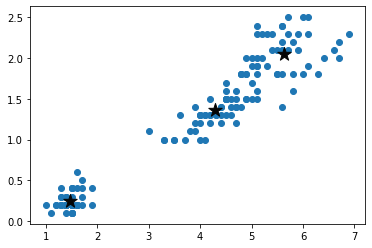

In [6]:
k = 3
random_index = np.random.choice(range(len(X)),k)
centroids = X[random_index]

tol = 0.0001
max_iter = 100

iter = 0
centroids_diff = 100000
clusters = np.zeros(len(X))

from copy import deepcopy
while iter < max_iter and centroids_diff > tol:
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i],centroids)
    centroids_prev = deepcopy(centroids)
    update_centroids(X,centroids,clusters)
    iter += 1
    centroids_diff = np.linalg.norm(centroids - centroids_prev)
        ##print('Iteration: ',str(iter))
        ##print('Centroids: ',centroids)
        ##print('Centroids move: {:5.4f}'.format(centroids_diff))
visualize_centroids(X, centroids)

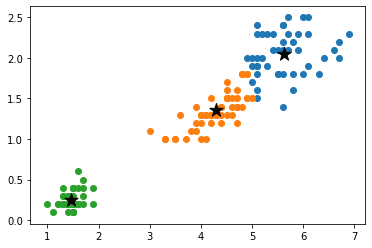

In [7]:
for i in range(k):
    cluster_i = np.where(clusters == i)
    plt.scatter(X[cluster_i,0],X[cluster_i,1])
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,c='#050505')
plt.show()

## Implementing k-means with scikit-learn

In [8]:
from sklearn.cluster import KMeans

In [9]:
k = 4
kmeans_sk = KMeans(n_clusters = k, random_state = 42)

In [10]:
kmeans_sk.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [11]:
clusters_sk = kmeans_sk.labels_
centroids_sk = kmeans_sk.cluster_centers_

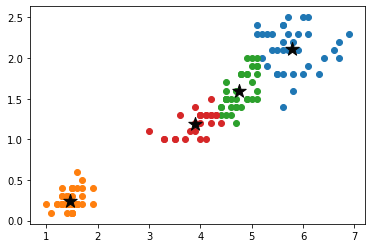

In [12]:
for i in range(k):
    cluster_i = np.where(clusters_sk == i)
    plt.scatter(X[cluster_i,0],X[cluster_i,1])
plt.scatter(centroids_sk[:,0],centroids_sk[:,1],marker='*',s=200,c='#050505')
plt.show()

## Choosing the value of k

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
k_list = list(range(1,7))
sse_list = [0]*len(k_list)

In [14]:
for k_ind,k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)
        sse += np.linalg.norm(X[cluster_i]-centroids[i])
    print('k={}, SSE={}'.format(k,sse))
    sse_list[k_ind] = sse

k=1, SSE=26.09261198117199
k=2, SSE=16.47171547133808
k=3, SSE=15.100944032266097
k=4, SSE=15.042199113318638
k=5, SSE=14.870397691633272
k=6, SSE=14.86047795395208


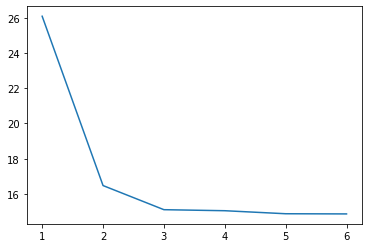

In [15]:
plt.plot(k_list,sse_list)
plt.show()

## Clustering newsgroups data using k-means

In [16]:
from sklearn.datasets import fetch_20newsgroups
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
groups = fetch_20newsgroups(subset='all',categories=categories)
labels = groups.target
label_names = groups.target_names
def is_letter_only(word):
    for char in word:
        if not char.isalpha():
            return False
        return True
from nltk.corpus import names
all_names = set(names.words())
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word)
                          for word in doc.split() if is_letter_only(word)
                          and word not in all_names)
    data_cleaned.append(doc_cleaned)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words = "english",
                              max_features = None,
                              max_df = 0.5,
                              min_df = 2)
data = count_vector.fit_transform(data_cleaned)

In [18]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [19]:
clusters = kmeans.labels_
from collections import Counter
print(Counter(clusters))

Counter({0: 3365, 3: 12, 2: 7, 1: 3})


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english',
                              max_features=None,
                              max_df=0.5,
                              min_df=2)
data = tfidf_vector.fit_transform(data_cleaned)
kmeans.fit(data)
clusters = kmeans.labels_
print(Counter(clusters))

Counter({3: 1577, 1: 1029, 2: 720, 0: 61})


In [21]:
cluster_label = {i: labels[np.where(clusters == i)] for i in range(k)}
terms = tfidf_vector.get_feature_names()
centroids = kmeans.cluster_centers_
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print('cluster_{}: {} samples'.format(cluster, len(index_list)))
    for label_index, count in sorted(counter.items(),
        key=lambda x: x[1], reverse=True):
        print('{}: {} samples'.format(label_names[label_index], count))
    print('Top 10 terms:')
    for ind in centroids[cluster].argsort()[-10:]:
        print(' %s' % terms[ind], end="")
    print()

cluster_0: 61 samples
sci.space: 61 samples
Top 10 terms:
 dunn resembles svr3 work utzoo zoo spencer zoology toronto henry
cluster_1: 1029 samples
alt.atheism: 640 samples
talk.religion.misc: 381 samples
sci.space: 5 samples
comp.graphics: 3 samples
Top 10 terms:
 morality don jesus sandvik say christian people com wa god
cluster_2: 720 samples
sci.space: 700 samples
comp.graphics: 10 samples
talk.religion.misc: 7 samples
alt.atheism: 3 samples
Top 10 terms:
 launch moon alaska shuttle gov digex wa access nasa space
cluster_3: 1577 samples
comp.graphics: 960 samples
talk.religion.misc: 240 samples
sci.space: 221 samples
alt.atheism: 156 samples
Top 10 terms:
 thanks know nntp host posting graphic file com image university


## Discovering underlying topics

In [22]:
from sklearn.decomposition import NMF
t = 20
nmf = NMF(n_components=t, random_state=42)
data = count_vector.fit_transform(data_cleaned)

In [23]:
nmf.fit(data)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [24]:
nmf.components_

array([[0.05199448, 0.        , 0.00016396, ..., 0.        , 0.        ,
        0.00066426],
       [0.00028246, 0.        , 0.00103722, ..., 0.        , 0.00046909,
        0.00136239],
       [0.        , 0.        , 0.00016499, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00315889, 0.        , 0.01103702, ..., 0.00100776, 0.00735967,
        0.00162324],
       [0.        , 0.        , 0.00024811, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00456599, ..., 0.        , 0.00022907,
        0.        ]])

In [25]:
terms = count_vector.get_feature_names()
for topic_idx,topic in enumerate(nmf.components_):
    print("Topis {}:".format(topic_idx))
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

Topis 0:
free program quality version format color gif file image jpeg
Topis 1:
graphics image server ftp pub file send graphic ray mail
Topis 2:
doe christian people believe belief religious religion atheism god atheist
Topis 3:
wa venus atmosphere sun surface moon solar spacecraft earth planet
Topis 4:
program include ha user software analysis processing data tool image
Topis 5:
shall wa said son unto christ mcconkie father lord god
Topis 6:
data venture service year ha market commercial space satellite launch
Topis 7:
day christian psalm people said prophecy ha wa matthew jesus
Topis 8:
program software format ha sgi package ftp available image data
Topis 9:
unified space motion book star physicist physical universe theory larson
Topis 10:
research sci group international national telescope satellite shuttle list space
Topis 11:
jpl available mission astronaut shuttle center data gov space nasa
Topis 12:
year magi new zarathushtra war book did time people wa
Topis 13:
form ha false 

## Topic modeling using LDA 

In [26]:
from sklearn.decomposition import LatentDirichletAllocation
t=20
lda = LatentDirichletAllocation(n_components=t,
                               learning_method='batch',
                               random_state=42)

In [27]:
data=count_vector.fit_transform(data_cleaned)
lda.fit(data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [28]:
lda.components_

array([[2.78477238, 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 1.24460302, ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.3395871 , ..., 0.05      , 0.05      ,
        0.05      ],
       ...,
       [0.05000002, 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 1.02314724, ..., 0.05      , 0.05      ,
        0.05      ]])

In [29]:
terms = count_vector.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic {}:".format(topic_idx))
    print(" ".join(terms[i] for i in
                  topic.argsort()[-10:]))

Topic 0:
say uk know ha life matthew just brian wa jesus
Topic 1:
oort nntp host distribution search know posting just gopher gamma
Topic 2:
conference nntp posting cost host year space wa digex access
Topic 3:
graphic software available ftp data program format jpeg file image
Topic 4:
computer help looking graphic know thanks posting university nntp host
Topic 5:
point host nntp posting solntze wpd livesey sgi com wa
Topic 6:
atheist doe morality moral religion think don god say people
Topic 7:
host know lis posting wa space university uiuc god cobb
Topic 8:
science send national cs center mail sci gov nasa space
Topic 9:
time people think like keith caltech just wa don com
Topic 10:
book ray star god wa energy physical larson universe theory
Topic 11:
don say jesus ha people know christian bible wa god
Topic 12:
wa ha zoology zoo satellite space spencer launch toronto henry
Topic 13:
rushdie shall ha christ people lord jesus law god wa
Topic 14:
know host nntp people posting just don